# **Data Import**

In [1]:
# Importing packages
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import scipy


In [2]:
# MODIFY THE LOCATION OF THE DATA HERE

answer = pd.read_csv("Data/combined.csv")

answer

AnswerText  Year  UserID  QuestionID  \
0                       37  2014       1           1   
1                       44  2014       2           1   
2                       32  2014       3           1   
3                       31  2014       4           1   
4                       31  2014       5           1   
...                    ...   ...     ...         ...   
236893               Other  2016    2689         117   
236894             Support  2016    2690         117   
236895  Back-end Developer  2016    2691         117   
236896     DevOps/SysAdmin  2016    2692         117   
236897               Other  2016    2693         117   

                                             questiontext  
0                                       What is your age?  
1                                       What is your age?  
2                                       What is your age?  
3                                       What is your age?  
4                                       What is your age?  
...                                                   ...  
236893  Which of the following best describes your wor...  
236894  Which of the following best describes your wor...  
236895  Which of the following best describes your wor...  
236896  Which of the following best describes your wor...  
236897  Which of the following best describes your wor...  

[236898 rows x 5 columns]

In [3]:
background_qs = [1,2,3,4,20,50,51,89]
employment_qs = [5,8,9,13,68,93,94,117,118]
mental_health_id_qs = [78,115,116]
mental_health_history_qs = [6,7,32,33,34]
employer_support_qs = [10,11,14,15,16,17,64,65,91,94,95,96,97,101,108]
previous_employer_qs = [22,23,24,25,26,27,69,70,71,72,73,74,75,76,77,110,111,112]
mental_health_communication_qs = [18,19,28,30,52,53,57,58,59,60,61,62,63,66,67,99,100,114]
impact_on_work_qs = [48,49,54,55,79,80,90,92,98,104,106,107,108,109,113]
workplace_observations_qs = [56,82,83,84,102,105]
industry_perception_qs = [12,29,81,85,86,101]
additional_qs = [21,87,88,103]

# **Data Transformation & Exploration**

**Data Visualisation**

In [4]:
# Create a table showing which QuestionIDs appear in which SurveyIDs
question_survey_table = answer.groupby(['Year', 'QuestionID']).size().unstack(fill_value=0)

# Print the table
print(question_survey_table.to_string())

QuestionID   1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    48    49    50    51    52    53    54    55    56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118
Year                                                                                                                                                                                                                                                                                                                                                                                                    

In [5]:
df = answer.pivot_table(index=['Year', 'UserID'], columns='QuestionID', values='AnswerText', aggfunc='first')

# Reset the index if needed
df.reset_index(inplace=True)

df.columns

Index([  'Year', 'UserID',        1,        2,        3,        4,        5,
              6,        7,        8,
       ...
            109,      110,      111,      112,      113,      114,      115,
            116,      117,      118],
      dtype='object', name='QuestionID', length=107)

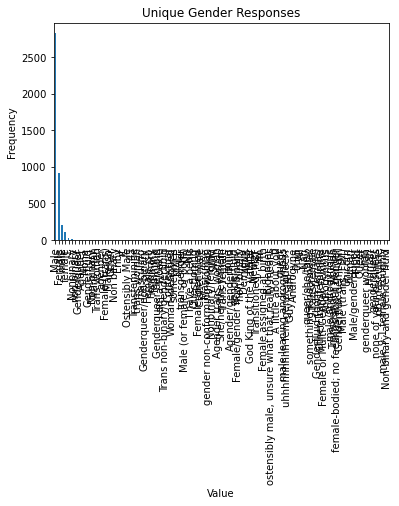

In [6]:
genders = df[2]

# Plot the frequency of each value
genders.value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Unique Gender Responses')
plt.show()

In [7]:
def categorize_gender(gender):
    if gender.lower() in ['Male', 'male', 'MALE']:
        return 'Male'
    elif gender.lower() in ['Female', 'female', 'Female-identified']:
        return 'Female'
    elif gender == '-1':
        return '-1'
    else:
        return 'Other'

# Apply the function to the '2' column
df[2] = df[2].apply(categorize_gender)

# Now the '2' column should have only 'Male', 'Female', or 'Other' values
print(df[2].unique())

['Female' 'Male' 'Other' '-1']


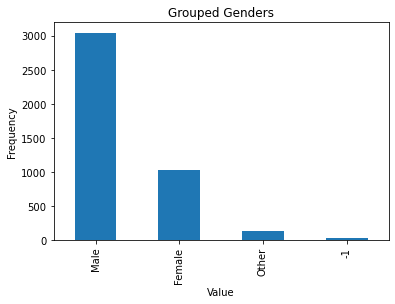

In [8]:
genders = df[2]

# Plot the frequency of each value
genders.value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Grouped Genders')
plt.show()

Some of them    610
No              196
Yes             185
Name: 99, dtype: int64


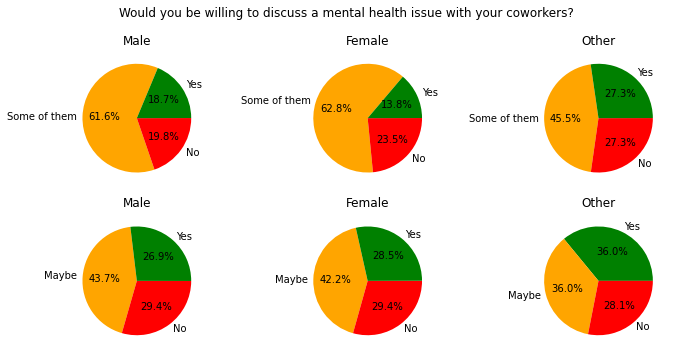

In [9]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_99 = df_male.loc[df_male[99] != '-1'][99].value_counts()
female_99 = df_female.loc[df_female[99] != '-1'][99].value_counts()
other_99 = df_other.loc[df_other[99] != '-1'][99].value_counts()
print(male_99)
# Create a figure with 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

colors = ['orange', 'red', 'green']
# Plot the first pie chart
axs[0][0].pie(male_99, labels=male_99.index, autopct='%1.1f%%', colors = colors, startangle=67.32)
axs[0][0].set_title('Male')

# Plot the second pie chart
axs[0][1].pie(female_99, labels=female_99.index, autopct='%1.1f%%', colors = colors, startangle=49.68)
axs[0][1].set_title('Female')

# Plot the third pie chart
axs[0][2].pie(other_99, labels=other_99.index, autopct='%1.1f%%', colors = colors, startangle=98.28)
axs[0][2].set_title('Other')

male_18 = df_male.loc[df_male[18] != '-1'][18].value_counts()
female_18 = df_female.loc[df_female[18] != '-1'][18].value_counts()
other_18 = df_other.loc[df_other[18] != '-1'][18].value_counts()

axs[1][0].pie(male_18, labels=male_18.index, autopct='%1.1f%%', colors = colors, startangle=96.84)
axs[1][0].set_title('Male')

# Plot the second pie chart
axs[1][1].pie(female_18, labels=female_18.index, autopct='%1.1f%%', colors = colors,startangle=102.6)
axs[1][1].set_title('Female')

# Plot the third pie chart
axs[1][2].pie(other_18, labels=other_18.index, autopct='%1.1f%%', colors = ['green','orange', 'red'])
axs[1][2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you be willing to discuss a mental health issue with your coworkers?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

In [10]:
"""
print("Chi-Squared Test")
print("Gender vs Willingness to discuss a mental health issue with coworkers")


contingency_table = pd.crosstab(df[2], df[18])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
"""

'\nprint("Chi-Squared Test")\nprint("Gender vs Willingness to discuss a mental health issue with coworkers")\n\n\ncontingency_table = pd.crosstab(df[2], df[18])\n\n# Perform the chi-squared test\nchi2, p, dof, expected = chi2_contingency(contingency_table)\n\nprint(f"Chi-squared: {chi2}")\nprint(f"P-value: {p}")\n'

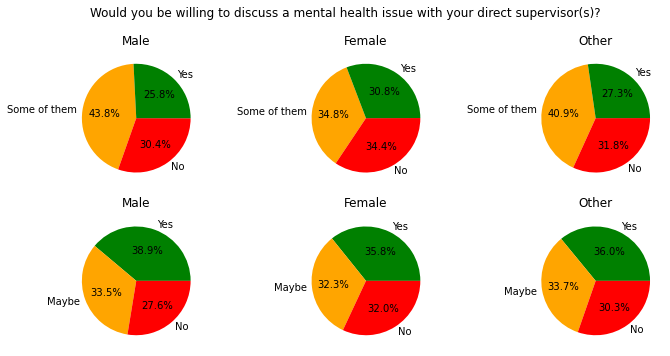

In [11]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_100 = df_male.loc[df_male[100] != '-1'][100].value_counts()
female_100 = df_female.loc[df_female[100] != '-1'][100].value_counts()
other_100 = df_other.loc[df_other[100] != '-1'][100].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

colors = ['orange', 'red', 'green']
# Plot the first pie chart
axs[0][0].pie(male_100, labels=other_100.index, autopct='%1.1f%%', colors = colors, startangle=92.88)
axs[0][0].set_title('Male')

# Plot the second pie chart
axs[0][1].pie(female_100, labels=other_100.index, autopct='%1.1f%%', colors = colors, startangle=110.88)
axs[0][1].set_title('Female')

# Plot the third pie chart
axs[0][2].pie(other_100, labels=other_100.index, autopct='%1.1f%%', colors = colors, startangle=98.28)
axs[0][2].set_title('Other')

male_19 = df_male.loc[df_male[19] != '-1'][19].value_counts()
female_19 = df_female.loc[df_female[19] != '-1'][19].value_counts()
other_19 = df_other.loc[df_other[19] != '-1'][19].value_counts()

axs[1][0].pie(male_19, labels=male_19.index, autopct='%1.1f%%', colors = ['green','orange', 'red'])
axs[1][0].set_title('Male')

# Plot the second pie chart
axs[1][1].pie(female_19, labels=female_19.index, autopct='%1.1f%%', colors = ['green','orange', 'red'])
axs[1][1].set_title('Female')

# Plot the third pie chart
axs[1][2].pie(other_19, labels=other_19.index, autopct='%1.1f%%', colors = ['green','orange', 'red'])
axs[1][2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you be willing to discuss a mental health issue with your direct supervisor(s)?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

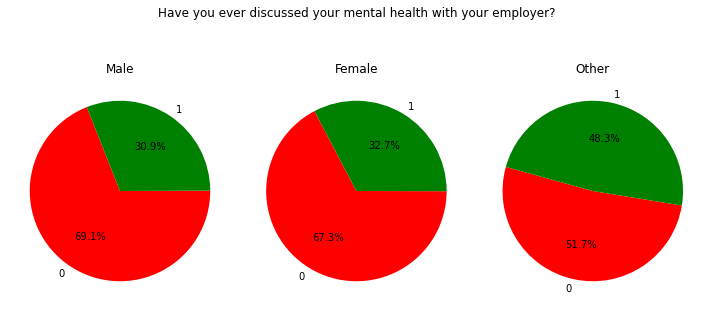

In [12]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_58 = df_male.loc[df_male[58] != '-1'][58].value_counts()
female_58 = df_female.loc[df_female[58] != '-1'][58].value_counts()
other_58 = df_other.loc[df_other[58] != '-1'][58].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['red', 'green']
# Plot the first pie chart
axs[0].pie(male_58, labels=male_58.index, autopct='%1.1f%%', colors = colors, startangle=111.6)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_58, labels=female_58.index, autopct='%1.1f%%', colors = colors, startangle=117.72)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_58, labels=other_58.index, autopct='%1.1f%%', colors = colors, startangle=164.52)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Have you ever discussed your mental health with your employer?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

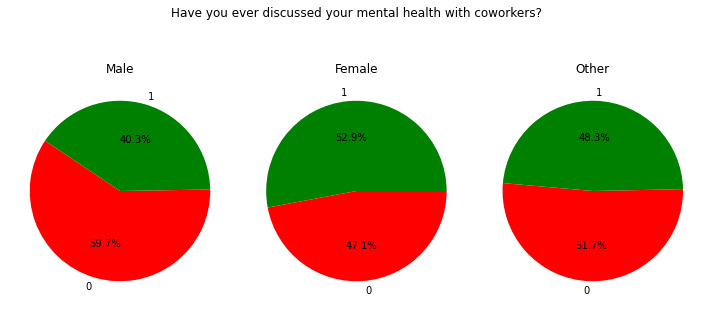

In [13]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_60 = df_male.loc[df_male[60] != '-1'][60].value_counts()
female_60 = df_female.loc[df_female[60] != '-1'][60].value_counts()
other_60 = df_other.loc[df_other[60] != '-1'][60].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['red', 'green']
# Plot the first pie chart
axs[0].pie(male_60, labels=male_60.index, autopct='%1.1f%%', colors = colors, startangle=146.16)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_60, labels=female_60.index, autopct='%1.1f%%', colors = ['green', 'red'], startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_60, labels=other_60.index, autopct='%1.1f%%', colors = colors, startangle=174.96)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Have you ever discussed your mental health with coworkers?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

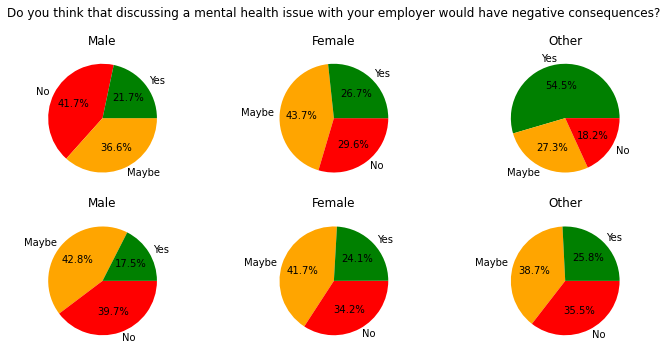

In [14]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_98 = df_male.loc[df_male[98] != '-1'][98].value_counts()
female_98 = df_female.loc[df_female[98] != '-1'][98].value_counts()
other_98 = df_other.loc[df_other[98] != '-1'][98].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

colors = ['orange', 'red', 'green']
# Plot the first pie chart
axs[0][0].pie(male_98, labels=male_98.index, autopct='%1.1f%%', colors = ['red', 'orange', 'green'], startangle=78.12)
axs[0][0].set_title('Male')

# Plot the second pie chart
axs[0][1].pie(female_98, labels=female_98.index, autopct='%1.1f%%', colors = colors, startangle=96.12)
axs[0][1].set_title('Female')

# Plot the third pie chart
axs[0][2].pie(other_98, labels=other_98.index, autopct='%1.1f%%', colors = ['green', 'orange', 'red'], startangle=0)
axs[0][2].set_title('Other')

male_104 = df_male.loc[df_male[104] != '-1'][104].value_counts()
female_104 = df_female.loc[df_female[104] != '-1'][104].value_counts()
other_104 = df_other.loc[df_other[104] != '-1'][104].value_counts()

axs[1][0].pie(male_104, labels=male_104.index, autopct='%1.1f%%', colors = colors, startangle=63)
axs[1][0].set_title('Male')

# Plot the second pie chart
axs[1][1].pie(female_104, labels=female_104.index, autopct='%1.1f%%', colors = colors,startangle=86.76)
axs[1][1].set_title('Female')

# Plot the third pie chart
axs[1][2].pie(other_104, labels=other_104.index, autopct='%1.1f%%', colors = colors,startangle=92.88)
axs[1][2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Do you think that discussing a mental health issue with your employer would have negative consequences?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

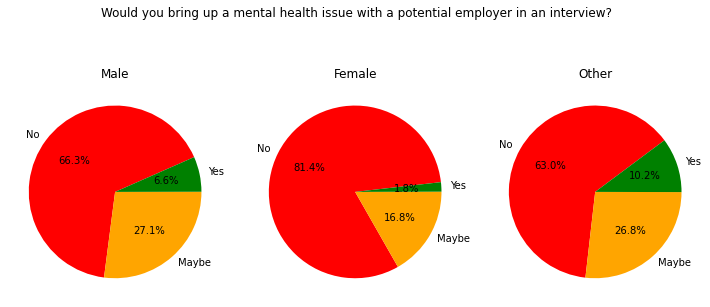

In [15]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_12 = df_male.loc[df_male[12] != '-1'][12].value_counts()
female_12 = df_female.loc[df_female[12] != '-1'][12].value_counts()
other_12 = df_other.loc[df_other[12] != '-1'][12].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['red', 'orange', 'green']
# Plot the first pie chart
axs[0].pie(male_12, labels=male_12.index, autopct='%1.1f%%', colors = colors, startangle=23.76)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_12, labels=female_12.index, autopct='%1.1f%%', colors = colors, startangle=6.48)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_12, labels=other_12.index, autopct='%1.1f%%', colors = colors, startangle=36.72)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you bring up a mental health issue with a potential employer in an interview?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

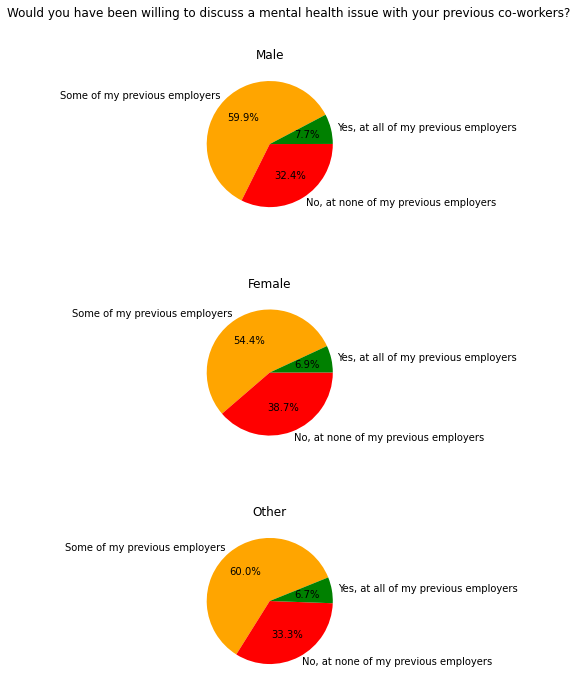

In [16]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_110 = df_male.loc[df_male[110] != '-1'][110].value_counts()
female_110 = df_female.loc[df_female[110] != '-1'][110].value_counts()
other_110 = df_other.loc[df_other[110] != '-1'][110].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 10))

colors = ['orange', 'red', 'green']
# Plot the first pie chart
axs[0].pie(male_110, labels=male_110.index, autopct='%1.1f%%', colors = colors, startangle=27.72)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_110, labels=female_110.index, autopct='%1.1f%%', colors = colors, startangle=24.84)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_110, labels=other_110.index, autopct='%1.1f%%', colors = colors, startangle=21.96)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you have been willing to discuss a mental health issue with your previous co-workers?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

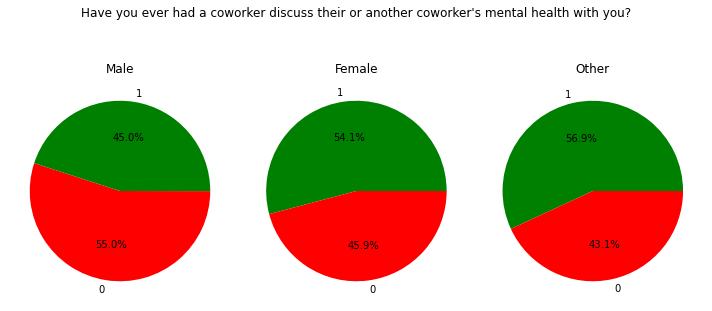

In [17]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_62 = df_male.loc[df_male[62] != '-1'][62].value_counts()
female_62 = df_female.loc[df_female[62] != '-1'][62].value_counts()
other_62 = df_other.loc[df_other[62] != '-1'][62].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['red','green']
# Plot the first pie chart
axs[0].pie(male_62, labels=male_62.index, autopct='%1.1f%%', colors = colors, startangle=162)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_62, labels=female_62.index, autopct='%1.1f%%', colors = ['green','red'], startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_62, labels=other_62.index, autopct='%1.1f%%', colors = ['green','red'], startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Have you ever had a coworker discuss their or another coworker\'s mental health with you?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

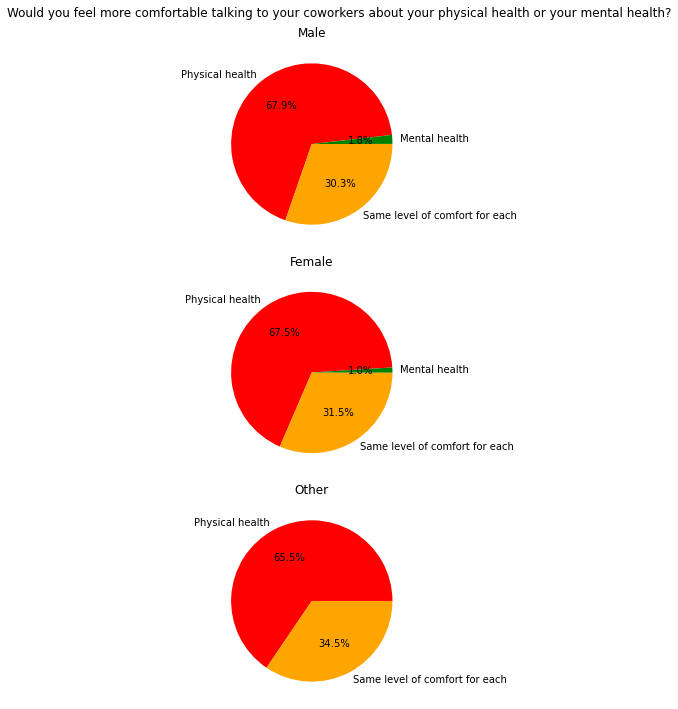

In [18]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_57 = df_male.loc[df_male[57] != '-1'][57].value_counts()
female_57 = df_female.loc[df_female[57] != '-1'][57].value_counts()
other_57 = df_other.loc[df_other[57] != '-1'][57].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 10))

colors = ['red', 'orange', 'green']
# Plot the first pie chart
axs[0].pie(male_57, labels=male_57.index, autopct='%1.1f%%', colors = colors, startangle=6.48)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_57, labels=female_57.index, autopct='%1.1f%%', colors = colors, startangle=3.6)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_57, labels=other_57.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you feel more comfortable talking to your coworkers about your physical health or your mental health?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

In [19]:
df = answer.pivot_table(index=['Year', 'UserID'], columns='QuestionID', values='AnswerText', aggfunc='first')

# Reset the index if needed
df.reset_index(inplace=True)

df.columns

Index([  'Year', 'UserID',        1,        2,        3,        4,        5,
              6,        7,        8,
       ...
            109,      110,      111,      112,      113,      114,      115,
            116,      117,      118],
      dtype='object', name='QuestionID', length=107)

[nan '-1' 'White' 'More than one of the above' 'Asian'
 'Black or African American' 'I prefer not to answer'
 'American Indian or Alaska Native' 'Hispanic' 'White Hispanic'
 'European American' 'Caucasian']


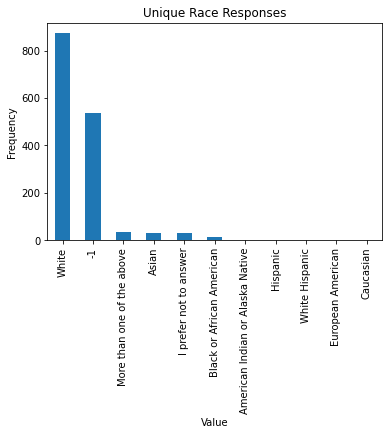

In [20]:
races = df[89]
print(df[89].unique())
# Plot the frequency of each value
races.value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Unique Race Responses')
plt.show()

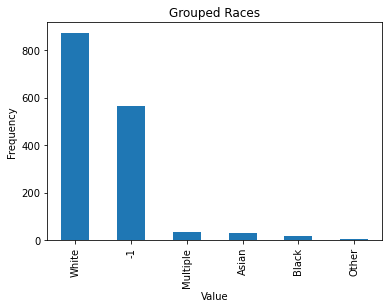

In [21]:
def categorize_race(race):
    if race == 'White' or race == 'Caucasian':
        return 'White'
    elif race == 'Black or African American':
        return 'Black'
    elif race == 'Asian':
        return 'Asian'
    elif race == 'More than one of the above':
        return 'Multiple'
    elif race == '-1' or race == 'I prefer not to answer':
        return '-1'
    elif race in ['American Indian or Alaska Native', 'Hispanic', 'White Hispanic', 'European American']:
        return 'Other'

# Apply the function to the '2' column
df[89] = df[89].apply(categorize_race)

# Now the '2' column should have only 'Male', 'Female', or 'Other' values
df[89].value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Grouped Races')
plt.show()

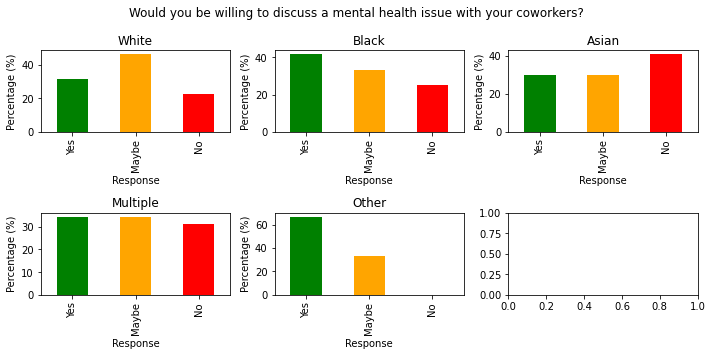

In [22]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_18 = df_white.loc[df_white[18] != '-1'][18].value_counts()
black_18 = df_black.loc[df_black[18] != '-1'][18].value_counts()
asian_18 = df_asian.loc[df_asian[18] != '-1'][18].value_counts()
multiple_18 = df_multiple.loc[df_multiple[18] != '-1'][18].value_counts()
other_races_18 = df_other_race.loc[df_other_race[18] != '-1'][18].value_counts()
total_white = white_18.sum()
white_18 = white_18 / total_white * 100
total_black = black_18.sum()
black_18 = black_18 / total_black * 100
total_asian = asian_18.sum()
asian_18 = asian_18 / total_asian * 100
total_multiple = multiple_18.sum()
multiple_18 = multiple_18 / total_multiple * 100
total_other = other_races_18.sum()
other_races_18 = other_races_18 / total_other * 100
order = ['Yes', 'Maybe', 'No']
white_18 = white_18.reindex(order)
black_18 = black_18.reindex(order)
asian_18 = asian_18.reindex(order)
multiple_18 = multiple_18.reindex(order)
other_races_18 = other_races_18.reindex(order)
colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

white_18.plot(kind='bar', ax=axs[0][0], color=colors)
axs[0][0].set_xlabel('Response')
axs[0][0].set_ylabel('Percentage (%)')
axs[0][0].set_title('White')

black_18.plot(kind='bar', ax=axs[0][1], color=colors)
axs[0][1].set_xlabel('Response')
axs[0][1].set_ylabel('Percentage (%)')
axs[0][1].set_title('Black')

asian_18.plot(kind='bar', ax=axs[0][2], color=colors)
axs[0][2].set_xlabel('Response')
axs[0][2].set_ylabel('Percentage (%)')
axs[0][2].set_title('Asian')

multiple_18.plot(kind='bar', ax=axs[1][0], color=colors)
axs[1][0].set_xlabel('Response')
axs[1][0].set_ylabel('Percentage (%)')
axs[1][0].set_title('Multiple')

other_races_18.plot(kind='bar', ax=axs[1][1], color=colors)
axs[1][1].set_xlabel('Response')
axs[1][1].set_ylabel('Percentage (%)')
axs[1][1].set_title('Other')

plt.suptitle('Would you be willing to discuss a mental health issue with your coworkers?', fontsize=12)
plt.tight_layout()
plt.show()

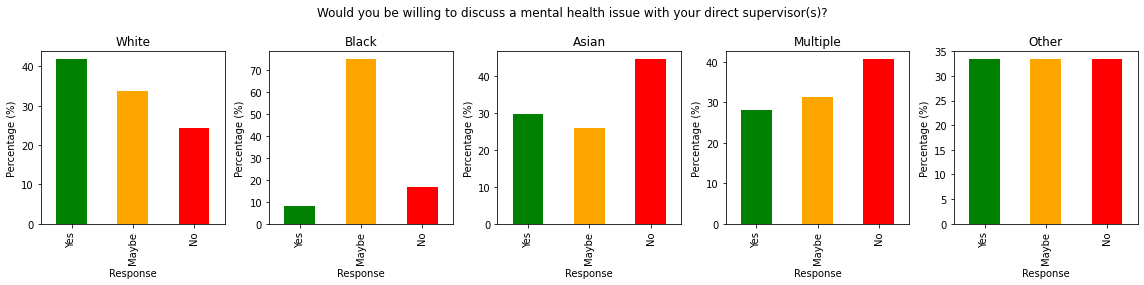

In [23]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_19 = df_white.loc[df_white[19] != '-1'][19].value_counts()
black_19 = df_black.loc[df_black[19] != '-1'][19].value_counts()
asian_19 = df_asian.loc[df_asian[19] != '-1'][19].value_counts()
multiple_19 = df_multiple.loc[df_multiple[19] != '-1'][19].value_counts()
other_races_19 = df_other_race.loc[df_other_race[19] != '-1'][19].value_counts()
total_white = white_19.sum()
white_19 = white_19 / total_white * 100
total_black = black_19.sum()
black_19 = black_19 / total_black * 100
total_asian = asian_19.sum()
asian_19 = asian_19 / total_asian * 100
total_multiple = multiple_19.sum()
multiple_19 = multiple_19 / total_multiple * 100
total_other = other_races_19.sum()
other_races_19 = other_races_19 / total_other * 100
order = ['Yes', 'Maybe', 'No']
white_19 = white_19.reindex(order)
black_19 = black_19.reindex(order)
asian_19 = asian_19.reindex(order)
multiple_19 = multiple_19.reindex(order)
other_races_19 = other_races_19.reindex(order)
colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_19.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_19.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_19.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_19.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_19.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Would you be willing to discuss a mental health issue with your direct supervisor(s)?', fontsize=12)
plt.tight_layout()
plt.show()

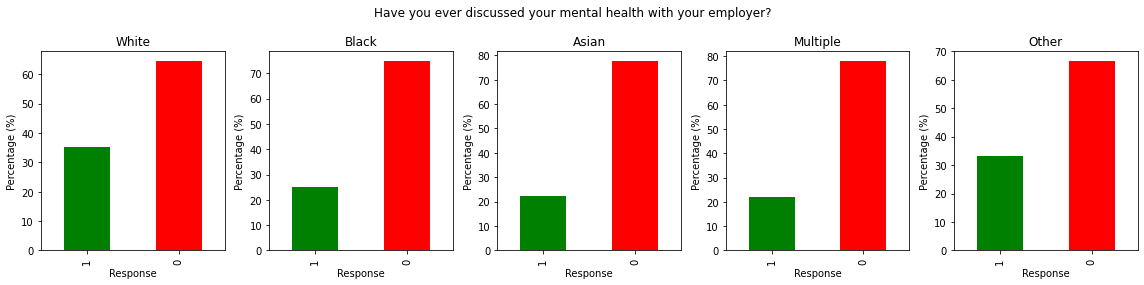

In [24]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_58 = df_white.loc[df_white[58] != '-1'][58].value_counts()
black_58 = df_black.loc[df_black[58] != '-1'][58].value_counts()
asian_58 = df_asian.loc[df_asian[58] != '-1'][58].value_counts()
multiple_58 = df_multiple.loc[df_multiple[58] != '-1'][58].value_counts()
other_races_58 = df_other_race.loc[df_other_race[58] != '-1'][58].value_counts()
total_white = white_58.sum()
white_58 = white_58 / total_white * 100
total_black = black_58.sum()
black_58 = black_58 / total_black * 100
total_asian = asian_58.sum()
asian_58 = asian_58 / total_asian * 100
total_multiple = multiple_58.sum()
multiple_58 = multiple_58 / total_multiple * 100
total_other = other_races_58.sum()
other_races_58 = other_races_58 / total_other * 100
order = ['1', '0']
white_58 = white_58.reindex(order)
black_58 = black_58.reindex(order)
asian_58 = asian_58.reindex(order)
multiple_58 = multiple_58.reindex(order)
other_races_58 = other_races_58.reindex(order)
colors = ['green', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_58.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_58.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_58.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_58.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_58.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Have you ever discussed your mental health with your employer?', fontsize=12)
plt.tight_layout()
plt.show()

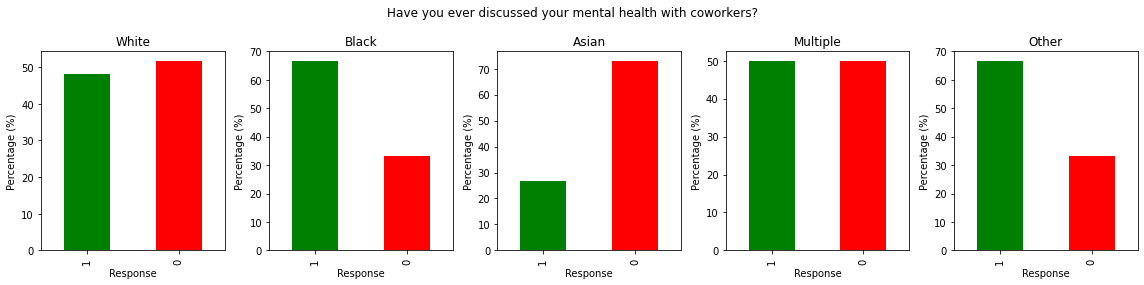

In [25]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_60 = df_white.loc[df_white[60] != '-1'][60].value_counts()
black_60 = df_black.loc[df_black[60] != '-1'][60].value_counts()
asian_60 = df_asian.loc[df_asian[60] != '-1'][60].value_counts()
multiple_60 = df_multiple.loc[df_multiple[60] != '-1'][60].value_counts()
other_races_60 = df_other_race.loc[df_other_race[60] != '-1'][60].value_counts()
total_white = white_60.sum()
white_60 = white_60 / total_white * 100
total_black = black_60.sum()
black_60 = black_60 / total_black * 100
total_asian = asian_60.sum()
asian_60 = asian_60 / total_asian * 100
total_multiple = multiple_60.sum()
multiple_60 = multiple_60 / total_multiple * 100
total_other = other_races_60.sum()
other_races_60 = other_races_60 / total_other * 100
order = ['1', '0']
white_60 = white_60.reindex(order)
black_60 = black_60.reindex(order)
asian_60 = asian_60.reindex(order)
multiple_60 = multiple_60.reindex(order)
other_races_60 = other_races_60.reindex(order)
colors = ['green', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_60.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_60.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_60.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_60.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_60.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Have you ever discussed your mental health with coworkers?', fontsize=12)
plt.tight_layout()
plt.show()

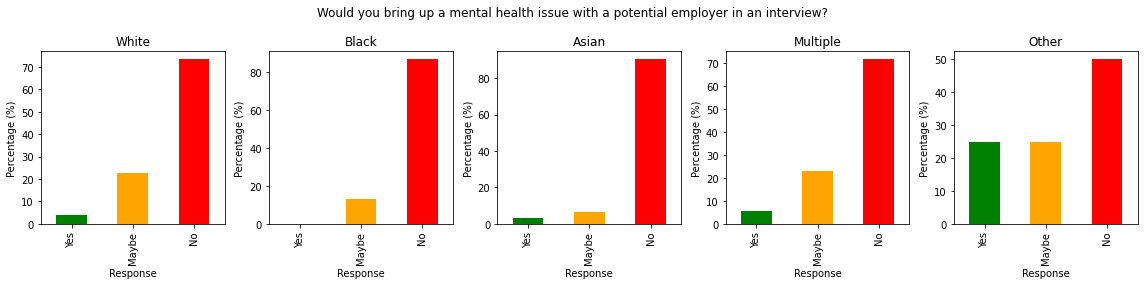

In [26]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_12 = df_white.loc[df_white[12] != '-1'][12].value_counts()
black_12 = df_black.loc[df_black[12] != '-1'][12].value_counts()
asian_12 = df_asian.loc[df_asian[12] != '-1'][12].value_counts()
multiple_12 = df_multiple.loc[df_multiple[12] != '-1'][12].value_counts()
other_races_12 = df_other_race.loc[df_other_race[12] != '-1'][12].value_counts()
total_white = white_12.sum()
white_12 = white_12 / total_white * 100
total_black = black_12.sum()
black_12 = black_12 / total_black * 100
total_asian = asian_12.sum()
asian_12 = asian_12 / total_asian * 100
total_multiple = multiple_12.sum()
multiple_12 = multiple_12 / total_multiple * 100
total_other = other_races_12.sum()
other_races_12 = other_races_12 / total_other * 100
order = ['Yes', 'Maybe', 'No']
white_12 = white_12.reindex(order)
black_12 = black_12.reindex(order)
asian_12 = asian_12.reindex(order)
multiple_12 = multiple_12.reindex(order)
other_races_12 = other_races_12.reindex(order)
colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_12.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_12.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_12.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_12.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_12.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Would you bring up a mental health issue with a potential employer in an interview?', fontsize=12)
plt.tight_layout()
plt.show()

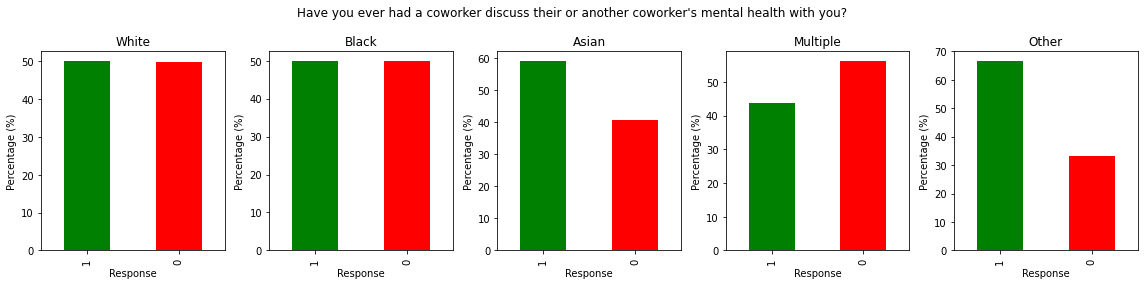

In [27]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_62 = df_white.loc[df_white[62] != '-1'][62].value_counts()
black_62 = df_black.loc[df_black[62] != '-1'][62].value_counts()
asian_62 = df_asian.loc[df_asian[62] != '-1'][62].value_counts()
multiple_62 = df_multiple.loc[df_multiple[62] != '-1'][62].value_counts()
other_races_62 = df_other_race.loc[df_other_race[62] != '-1'][62].value_counts()
total_white = white_62.sum()
white_62 = white_62 / total_white * 100
total_black = black_62.sum()
black_62 = black_62 / total_black * 100
total_asian = asian_62.sum()
asian_62 = asian_62 / total_asian * 100
total_multiple = multiple_62.sum()
multiple_62 = multiple_62 / total_multiple * 100
total_other = other_races_62.sum()
other_races_62 = other_races_62 / total_other * 100
order = ['1', '0']
white_62 = white_62.reindex(order)
black_62 = black_62.reindex(order)
asian_62 = asian_62.reindex(order)
multiple_62 = multiple_62.reindex(order)
other_races_62 = other_races_62.reindex(order)
colors = ['green', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_62.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_62.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_62.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_62.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_62.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Have you ever had a coworker discuss their or another coworker\'s mental health with you?', fontsize=12)
plt.tight_layout()
plt.show()

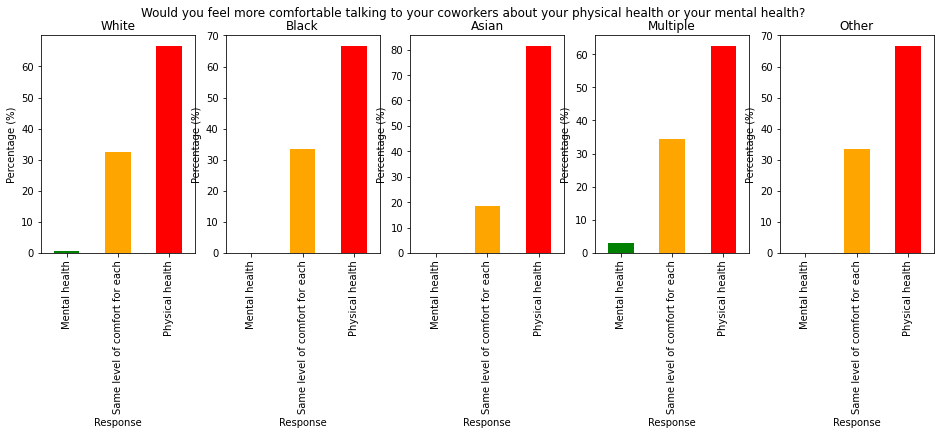

In [28]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_57 = df_white.loc[df_white[57] != '-1'][57].value_counts()
black_57 = df_black.loc[df_black[57] != '-1'][57].value_counts()
asian_57 = df_asian.loc[df_asian[57] != '-1'][57].value_counts()
multiple_57 = df_multiple.loc[df_multiple[57] != '-1'][57].value_counts()
other_races_57 = df_other_race.loc[df_other_race[57] != '-1'][57].value_counts()
total_white = white_57.sum()
white_57 = white_57 / total_white * 100
total_black = black_57.sum()
black_57 = black_57 / total_black * 100
total_asian = asian_57.sum()
asian_57 = asian_57 / total_asian * 100
total_multiple = multiple_57.sum()
multiple_57 = multiple_57 / total_multiple * 100
total_other = other_races_57.sum()
other_races_57 = other_races_57 / total_other * 100
order = ['Mental health', 'Same level of comfort for each', 'Physical health']
white_57 = white_57.reindex(order)
black_57 = black_57.reindex(order)
asian_57 = asian_57.reindex(order)
multiple_57 = multiple_57.reindex(order)
other_races_57 = other_races_57.reindex(order)
colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_57.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_57.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_57.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_57.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_57.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Would you feel more comfortable talking to your coworkers about your physical health or your mental health?', fontsize=12)
#plt.tight_layout()
plt.show()